fetching data cleaning the data

In [40]:
def fetch_data(symbol, indicator, api_key):
    url = 'https://www.alphavantage.co/query'
    params = {
        'function': indicator,
        'symbol': symbol,
        'interval': '5min',  
        'apikey': api_key
    }
    response = requests.get(url, params=params)
    
    # Check for a successful API call
    if response.status_code == 200:
        data = response.json()
        
        # Ensure the expected data is in the response
        if 'Time Series (5min)' in data:
            # Extract the time series data
            df = pd.DataFrame.from_dict(data['Time Series (5min)'], orient='index')
            df = df.rename(columns={
                '1. open': 'open',
                '2. high': 'high',
                '3. low': 'low',
                '4. close': 'close',
                '5. volume': 'volume'
            })
            df.index = pd.to_datetime(df.index)  # Convert the index to datetime
            df = df.astype(float)  # Ensure numeric data type for calculations
            return df
        else:
            print("Error: No data found for this symbol.")
            return None
    else:
        print("Error: Failed to retrieve data.")
        return None

# Fetch data for AAPL
api_key = 'S8SRQ9WZV479H6YZ' 
symbol = 'AAPL'
data = fetch_data(symbol, 'TIME_SERIES_INTRADAY', api_key)

if data is not None:
    # 1. Check for missing values
    print("Missing values in the data:")
    print(data.isna().sum())  # Count missing values in each column
    
    # 2. Handle missing values (e.g., forward fill or drop rows with missing data)
    data = data.fillna(method='ffill')  # Forward fill missing values
    # Alternatively, you could drop rows with missing values:
    # data = data.dropna()
    
    # 3. Ensure correct data types (convert columns to float if needed)
    data = data.astype(float)  # In case some columns were not properly converted
    
    # 4. Check for duplicates based on the index (timestamp)
    data = data[~data.index.duplicated(keep='last')]  # Keep the last occurrence
    

    # 5. Sort data by the index (timestamp)
    data = data.sort_index()  # Ensure data is sorted by timestamp
    
    # 6. Display cleaned data
    print("Cleaned data:")
    print(data.head())  # Display the first few rows of the cleaned data


Missing values in the data:
open      0
high      0
low       0
close     0
volume    0
dtype: int64
Cleaned data:
                         open      high     low    close    volume
2024-11-07 11:40:00  226.2851  226.4400  226.23  226.380  220716.0
2024-11-07 11:45:00  226.3900  226.7300  226.39  226.710  423286.0
2024-11-07 11:50:00  226.7150  226.9400  226.70  226.905  299430.0
2024-11-07 11:55:00  226.9000  227.1000  226.84  227.070  417977.0
2024-11-07 12:00:00  227.0620  227.1099  226.76  227.020  288260.0


C:\Users\japje\AppData\Local\Temp\ipykernel_23108\1411401961.py:47: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')  # Forward fill missing values


Insight_1

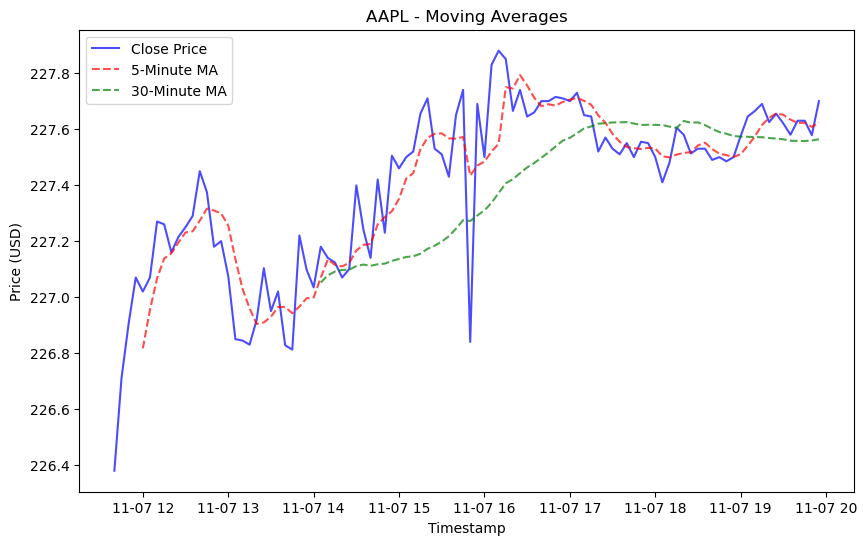

Bullish Signal: Golden Cross (Short-term MA is above Long-term MA)


In [41]:
# Calculate short-term (5-period) and long-term (30-period) moving averages
data['MA_5'] = data['close'].rolling(window=5).mean()
data['MA_30'] = data['close'].rolling(window=30).mean()

# Plot the data and moving averages
plt.figure(figsize=(10, 6))
plt.plot(data['close'], label='Close Price', color='blue', alpha=0.7)
plt.plot(data['MA_5'], label='5-Minute MA', color='red', linestyle='--', alpha=0.7)
plt.plot(data['MA_30'], label='30-Minute MA', color='green', linestyle='--', alpha=0.7)
plt.title(f'{symbol} - Moving Averages')
plt.xlabel('Timestamp')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# Golden Cross and Death Cross
if data['MA_5'].iloc[-1] > data['MA_30'].iloc[-1]:
    print("Bullish Signal: Golden Cross (Short-term MA is above Long-term MA)")
else:
    print("Bearish Signal: Death Cross (Short-term MA is below Long-term MA)")


Insight_2

Estimated Volatility (5-minute returns): 0.0017


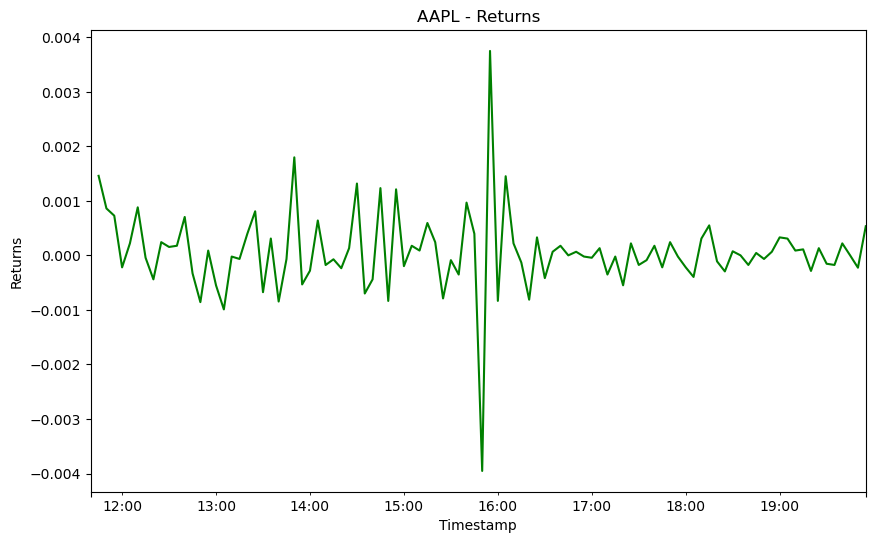

Low Volatility: Suitable for stable long-term growth.


In [42]:

# Calculate returns (percentage change in closing prices)
data['returns'] = data['close'].pct_change()

# Calculate volatility (standard deviation of returns) over the given period (annualized for daily trading)
volatility = data['returns'].std() * np.sqrt(5)  # Annualized volatility approximation (5 trading days/week)
print(f"Estimated Volatility (5-minute returns): {volatility:.4f}")

# Plot the returns
plt.figure(figsize=(10, 6))
data['returns'].plot(title=f'{symbol} - Returns', color='green')
plt.xlabel('Timestamp')
plt.ylabel('Returns')
plt.show()

# Volatility Insight
if volatility > 0.01:
    print("High Volatility: Consider a conservative strategy or lower exposure to this stock.")
else:
    print("Low Volatility: Suitable for stable long-term growth.")


In [43]:

# Assuming 'data' is the cleaned DataFrame with intraday stock data
symbol = 'AAPL'  

# Calculate short-term (5-period) and long-term (30-period) moving averages
data['MA_5'] = data['close'].rolling(window=5).mean()
data['MA_30'] = data['close'].rolling(window=30).mean()

# Calculate returns (percentage change in closing prices)
data['returns'] = data['close'].pct_change()

# Function to generate the investment report
def generate_investment_report(data, symbol):
    print(f"\nInvestment Report for {symbol}")
    print("--------------------------------------------------")
    
    # Moving Average Insights
    if data['MA_5'].iloc[-1] > data['MA_30'].iloc[-1]:
        print("Bullish Signal: Golden Cross (Short-term MA is above Long-term MA)")
    else:
        print("Bearish Signal: Death Cross (Short-term MA is below Long-term MA)")
    
    # Volatility Insights
    volatility = data['returns'].std() * np.sqrt(5)  # Annualized volatility approximation (5 trading days/week)
    print(f"Estimated Volatility (5-minute returns): {volatility:.4f}")
    if volatility > 0.01:
        print("High Volatility: Consider a conservative strategy or lower exposure to this stock.")
    else:
        print("Low Volatility: Suitable for stable long-term growth.")
    
# Call the function to generate the report
generate_investment_report(data, symbol)


Investment Report for AAPL
--------------------------------------------------
Bullish Signal: Golden Cross (Short-term MA is above Long-term MA)
Estimated Volatility (5-minute returns): 0.0017
Low Volatility: Suitable for stable long-term growth.
